In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [5]:
wine = datasets.load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
X = df[['alcohol', 'malic_acid']]
y = df['target']

In [7]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_sub_X, val_X, train_sub_y, val_y = train_test_split(train_X, train_y, test_size=0.4, random_state=42)

In [8]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(train_sub_X, train_sub_y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'alcohol <= 12.755\ngini = 0.654\nsamples = 85\nvalue = [23, 36, 26]'),
 Text(0.25, 0.5, 'malic_acid <= 4.515\ngini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.202\nsamples = 35\nvalue = [0, 31, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'malic_acid <= 2.335\ngini = 0.586\nsamples = 48\nvalue = [23, 5, 20]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.435\nsamples = 29\nvalue = [21, 5, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.188\nsamples = 19\nvalue = [2, 0, 17]')]

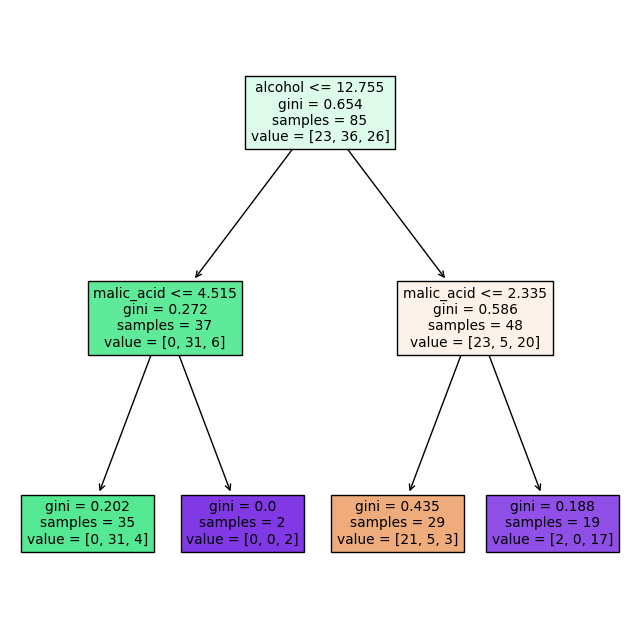

In [9]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8, 8))
plot_tree(model, filled=True, feature_names=['alcohol', 'malic_acid'])

In [10]:
print('훈련 데이터셋 accuracy : {}'.format(model.score(train_sub_X, train_sub_y)))
print('검증 데이터셋 accuracy : {}'.format(model.score(val_X, val_y)))

훈련 데이터셋 accuracy : 0.8352941176470589
검증 데이터셋 accuracy : 0.7719298245614035


In [11]:
model_cv = DecisionTreeClassifier(max_depth=2, random_state=42)
scores=cross_validate(model_cv, train_X, train_y)
print(scores)

{'fit_time': array([0.00751066, 0.00317621, 0.00499201, 0.00268149, 0.00317764]), 'score_time': array([0.00213957, 0.00195479, 0.00194788, 0.0021081 , 0.00231791]), 'test_score': array([0.75862069, 0.68965517, 0.75      , 0.71428571, 0.82142857])}


In [12]:
np.mean(scores['test_score'])

0.7467980295566502

In [13]:
print("테스트 데이터셋 accuracy: {}".format(model.score(test_X, test_y)))

테스트 데이터셋 accuracy: 0.8611111111111112


In [14]:
params = {'max_depth':[1, 2, 3, 4, 5]}
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params)
gs.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5]})

In [15]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=3, random_state=42)

In [16]:
print("테스트 데이터셋 accuracy: {}".format(gs.score(test_X, test_y)))

테스트 데이터셋 accuracy: 0.8888888888888888


In [17]:
scores=cross_validate(gs, train_X, train_y)
np.mean(scores['test_score'])

0.7608374384236453

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# 랜덤 포레스트 모델 초기화
rf_model = RandomForestClassifier(n_estimators=10, random_state=42, max_depth=2)

# 모델 학습
rf_model.fit(train_sub_X, train_sub_y)

# 정확도 출력
train_accuracy = accuracy_score(train_sub_y, rf_model.predict(train_sub_X))
val_accuracy = accuracy_score(val_y, rf_model.predict(val_X))
test_accuracy = accuracy_score(test_y, rf_model.predict(test_X))

print('훈련 데이터셋 accuracy : {:.2f}'.format(train_accuracy))
print('검증 데이터셋 accuracy : {:.2f}'.format(val_accuracy))
print('테스트 데이터셋 accuracy : {:.2f}'.format(test_accuracy))



훈련 데이터셋 accuracy : 0.84
검증 데이터셋 accuracy : 0.79
테스트 데이터셋 accuracy : 0.83
